# Модуль 2. Лабораторная работа

<b>Цель работы: </b> построение и применение моделей машинного обучения к несбалансированным данным.

In [ ]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
# Загрузите датасет и выведите его как таблицу
file_path = 'lending_data.csv'

df = pd.read_csv(file_path)

display(df)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.00,7.67,52800,0.43,5,1,22800,0
1,8400.00,6.69,43600,0.31,3,0,13600,0
2,9000.00,6.96,46100,0.35,3,0,16100,0
3,10700.00,7.66,52700,0.43,5,1,22700,0
4,10800.00,7.70,53000,0.43,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.00,11.26,86600,0.65,12,2,56600,1
77532,17700.00,10.66,80900,0.63,11,2,50900,1
77533,17600.00,10.60,80300,0.63,11,2,50300,1
77534,16300.00,10.07,75300,0.60,10,2,45300,1


# Построение модели линейной регрессии для предсказания дохода заемщика

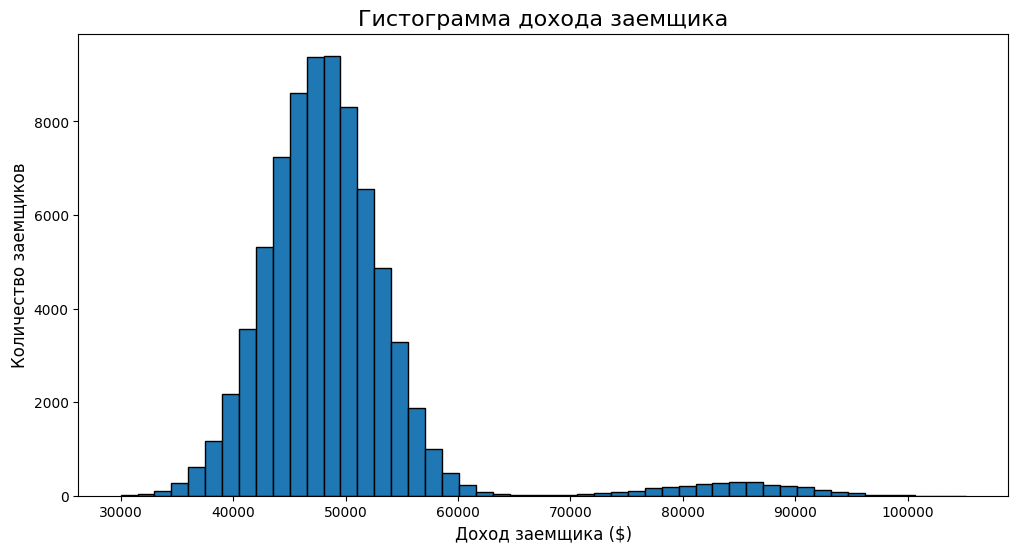

In [ ]:
# Постройте гистограмму дохода заемщика (borrower_income)

# ваш код здесь
plt.figure(figsize=(12, 6))
plt.hist(df['borrower_income'], bins=50, edgecolor='black')

plt.title('Гистограмма дохода заемщика', fontsize=16)
plt.xlabel('Доход заемщика ($)', fontsize=12)
plt.ylabel('Количество заемщиков', fontsize=12)

plt.show()

In [ ]:
# Применим лог трансформ к таргетной переменной
df_copy = df.copy()
df_copy['borrower_income'] = np.log(df_copy['borrower_income'])

y = df_copy['borrower_income'].values
y

array([10.87426647, 10.68281243, 10.73856823, ..., 11.2935249 ,
       11.22923541, 11.18857941])

### Нормализация данных

In [ ]:
# 1. Удалите ненужные колонки ('borrower_income', 'debt_to_income', 'loan_status')

# ваш код здесь
columns_to_remove = ['borrower_income', 'debt_to_income', 'loan_status']

df_copy = df_copy.drop(columns=columns_to_remove)

display(df_copy)

,loan_size,interest_rate,num_of_accounts,derogatory_marks,total_debt
0,10700.00,7.67,5,1,22800
1,8400.00,6.69,3,0,13600
2,9000.00,6.96,3,0,16100
3,10700.00,7.66,5,1,22700
4,10800.00,7.70,5,1,23000
...,...,...,...,...,...
77531,19100.00,11.26,12,2,56600
77532,17700.00,10.66,11,2,50900
77533,17600.00,10.60,11,2,50300
77534,16300.00,10.07,10,2,45300


In [ ]:
from re import X
# 2. Используйте StandardScaler из библиотеки sklearn для нормализации численных данных
from sklearn.preprocessing import StandardScaler

# ваш код здесь
scaler = StandardScaler()

n_columns = df_copy.select_dtypes(include=['float64', 'int64']).columns


In [ ]:
# Не забудьте обозначить нормализованные признаки за Х

# ваш код здесь
df_scaled = scaler.fit_transform(df_copy[n_columns])
X = pd.DataFrame(df_scaled, columns=n_columns)
X.head()

,loan_size,interest_rate,num_of_accounts,derogatory_marks,total_debt
0,0.43,0.43,0.62,1.04,0.43
1,-0.67,-0.67,-0.43,-0.67,-0.67
2,-0.38,-0.37,-0.43,-0.67,-0.37
3,0.43,0.42,0.62,1.04,0.42
4,0.48,0.46,0.62,1.04,0.45


### Деление данных на тренировочные и тестовые выборки

In [ ]:
# Используйте train_test_split для деления данных на выборки
from sklearn.model_selection import train_test_split

# ваш код здесь
X = df_copy.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Построение модели

In [ ]:
# Инициализируйте модель линейной регрессии и примерьте тренировочные данные
from sklearn.linear_model import LinearRegression

# ваш код здесь
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# сделайте предсказания, воспользовавшись методом predict

# ваш код здесь
y_train_pred1 = model.predict(X_test)

y_train_pred = model.predict(X_train)

### Оценка модели (замените переменные, если нужно)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats

print("R-squared score:", r2_score(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))

R-squared score: 0.9763370663063782
MSE: 0.0005017334250296435


In [ ]:
y_train = np.exp(y_train)
y_train_pred = np.exp(y_train_pred)

df1 = pd.DataFrame(data = y_train, columns = ['y_true'])
df2 = pd.DataFrame(data = y_train_pred, columns = ['prediction'])

train_pred = pd.concat([df1, df2],  axis=1)

display(train_pred)

,y_true,prediction
0,45600.00,45611.31
1,51000.00,50482.04
2,44600.00,44887.33
3,55900.00,54672.80
4,48100.00,47561.94
...,...,...
62023,51700.00,51047.02
62024,49500.00,48611.00
62025,84000.00,87929.52
62026,48100.00,47554.93


### Предсказания на тестовой выборке

In [ ]:
# сделайте предсказания, воспользовавшись методом predict

# ваш код здесь
y_test_pred = model.predict(X_test)

In [ ]:
print("R-squared score:", r2_score(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))

R-squared score: 0.9753861957397028
MSE: 0.0005216125271023882


In [ ]:
y_test = np.exp(y_test)
y_test_pred = np.exp(y_test_pred)

In [ ]:
df1 = pd.DataFrame(data = y_test, columns = ['y_true'])
df2 = pd.DataFrame(data = y_test_pred, columns = ['prediction'])

test_pred = pd.concat([df1, df2],  axis=1)

display(test_pred)

,y_true,prediction
0,42500.00,43327.92
1,45800.00,45750.90
2,49700.00,48767.91
3,46200.00,46028.87
4,50500.00,50087.17
...,...,...
15503,56300.00,55013.07
15504,41800.00,42844.38
15505,49200.00,48404.28
15506,44100.00,44553.50


In [ ]:
test_pred.describe()

,y_true,prediction
count,15508.00,15508.00
mean,49201.97,49213.31
std,8325.74,8800.61
min,32200.00,36642.43
25%,44800.00,45045.49
50%,48100.00,47551.43
75%,51600.00,50959.21
max,104100.00,123619.51


# Построение модели логистической регрессии для предсказания "loan_status" (возможности заемщика выплатить кредит)

In [ ]:
display(df)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.00,7.67,52800,0.43,5,1,22800,0
1,8400.00,6.69,43600,0.31,3,0,13600,0
2,9000.00,6.96,46100,0.35,3,0,16100,0
3,10700.00,7.66,52700,0.43,5,1,22700,0
4,10800.00,7.70,53000,0.43,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.00,11.26,86600,0.65,12,2,56600,1
77532,17700.00,10.66,80900,0.63,11,2,50900,1
77533,17600.00,10.60,80300,0.63,11,2,50300,1
77534,16300.00,10.07,75300,0.60,10,2,45300,1


In [ ]:
# Делим данные на признаки и таргет

# отделяем переменную 'loan_status' как таргет
y = df['loan_status']

# остальные переменные оставляем как признаки
X = df.drop(columns=['loan_status'])

In [ ]:
# проверяем сбалансированность классов
y.value_counts()

,count
loan_status,
0,75036
1,2500


### Деление данных на тренировочную и тестовую выборки

In [ ]:
# Поделите данные, используя train_test_split
# Назначьте random_state = 1 для воспроизводимости

# ваш код здесь
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Построение модели

In [ ]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Инициируйте модель логистической регрессии
# Назначьте random_state = 1 для воспроизводимости

# ваш код здесь
logistic_regression_model = LogisticRegression(random_state=1)

# Примерьте тренировочные данные к модели)

# ваш код здесь
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Предсказания для тестовых данных

In [ ]:
# Сделайте предсказания для тестовых данных

# ваш код здесь
y_test_pred = logistic_regression_model.predict(X_test)


### Оценка работы модели (на несбалансированных данных)

In [ ]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, y_test_pred)

0.9668615123225841

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix for the model
print(confusion_matrix(y_test, y_test_pred))

# TN FP
# FN TP

[[14924    77]
 [   31   476]]


In [ ]:
# Print the classification report for the model
print(classification_report_imbalanced(y_test, y_test_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.94      1.00      0.97      0.94     15001
          1       0.86      0.94      0.99      0.90      0.97      0.93       507

avg / total       0.99      0.99      0.94      0.99      0.97      0.94     15508



### Балансировка классов

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Инициируем балансировщик с random_state=1
random_oversampler = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler mode
X_resampled, y_resampled = random_oversampler.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
# Проверяем сбалансированность классов
y_resampled.value_counts()

,count
loan_status,
0,60035
1,60035


### Построение модели логистической регрессии на сбалансированных данных

In [ ]:
# Инициируйте модель логистической регрессии
# Назначьте random_state = 1 для воспроизводимости

# ваш код здесь
logistic_regression_model = LogisticRegression(random_state=1)

# Примерьте тренировочные данные к модели

# ваш код здесь
logistic_regression_model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [ ]:
# Сделайте предсказания на тестовых данных

# ваш код здесь
y_test_pred = logistic_regression_model.predict(X_test)

### Print results

In [ ]:
# Проверяем точность модели
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_test_pred)
print(accuracy)

0.9941965437193706


In [ ]:
# Генерируем матрицу ошибок
confusion_matrix_result = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_result)

[[14914    87]
 [    3   504]]


In [ ]:
# Print the classification report for the model
report = classification_report(y_test, y_test_pred, target_names=['Класс 0', 'Класс 1'])
print(report)

              precision    recall  f1-score   support

     Класс 0       1.00      0.99      1.00     15001
     Класс 1       0.85      0.99      0.92       507

    accuracy                           0.99     15508
   macro avg       0.93      0.99      0.96     15508
weighted avg       0.99      0.99      0.99     15508



### <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Ответьте на вопрос: </h1>
<b>Как сбалансированность классов повлияла на работу модели?</b> <br>
<b>Опирайтесь на метрики точности и матрицу ошибок при своем ответе.</b>
</div>

Балансировка классов улучшила анализ модели:

1) Во первых улучшилась точность:
*   было 0.9668615123225841
*   стало 0.9941965437193706

2) Во вторых:
FN значительно уменьшилось (с 31 до 3)
FP незначительно увеличилось (с 77 до 87)

 # Построение модели опорных векторов для предсказания 'loan_status'

### Построение модели

In [ ]:
from sklearn import svm
model = svm.SVC(kernel='poly', degree=3)
model.fit(X_train, y_train)

SVC(kernel='poly')

### Предсказания на тестовой выборке

In [ ]:
# Сделайте предсказания на тестовых данных

# ваш код здесь
pred = model.predict(X_test)

### Оценка модели

In [ ]:
# выведите balanced_accuracy_score
balanced_accuracy = balanced_accuracy_score(y_test, pred)
print(balanced_accuracy)

0.9923025512960543


In [ ]:
# Сгенерируйте confusion_matrix для модели
confusion_matrix_result = confusion_matrix(y_test, pred)
print(confusion_matrix_result)

[[14918    83]
 [    5   502]]


In [ ]:
# Выведите classification_report для модели
report = classification_report_imbalanced(y_test, pred)
print(report)

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.99      1.00      0.99      0.99     15001
          1       0.86      0.99      0.99      0.92      0.99      0.98       507

avg / total       1.00      0.99      0.99      0.99      0.99      0.99     15508



# Построение дерева решений для предсказания 'loan_status'

### Построение модели

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# постройте базовую модель с дефолтными параметрами и примерьте тренировочные данные

# ваш код здесь
model_corrected = DecisionTreeClassifier()

model_corrected.fit(X_train, y_train)

DecisionTreeClassifier()

### Предсказания на тестовой выборке

In [ ]:
# Сделайте предсказания на тестовых данных

# ваш код здесь
pred = model_corrected.predict(X_test)

In [ ]:
# оцените точность модели (balanced_accuracy_score)

# ваш код здесь
balanced_accuracy = balanced_accuracy_score(y_test, pred)
print(balanced_accuracy)

0.9247551806868366


### Визуализируйте дерево решений

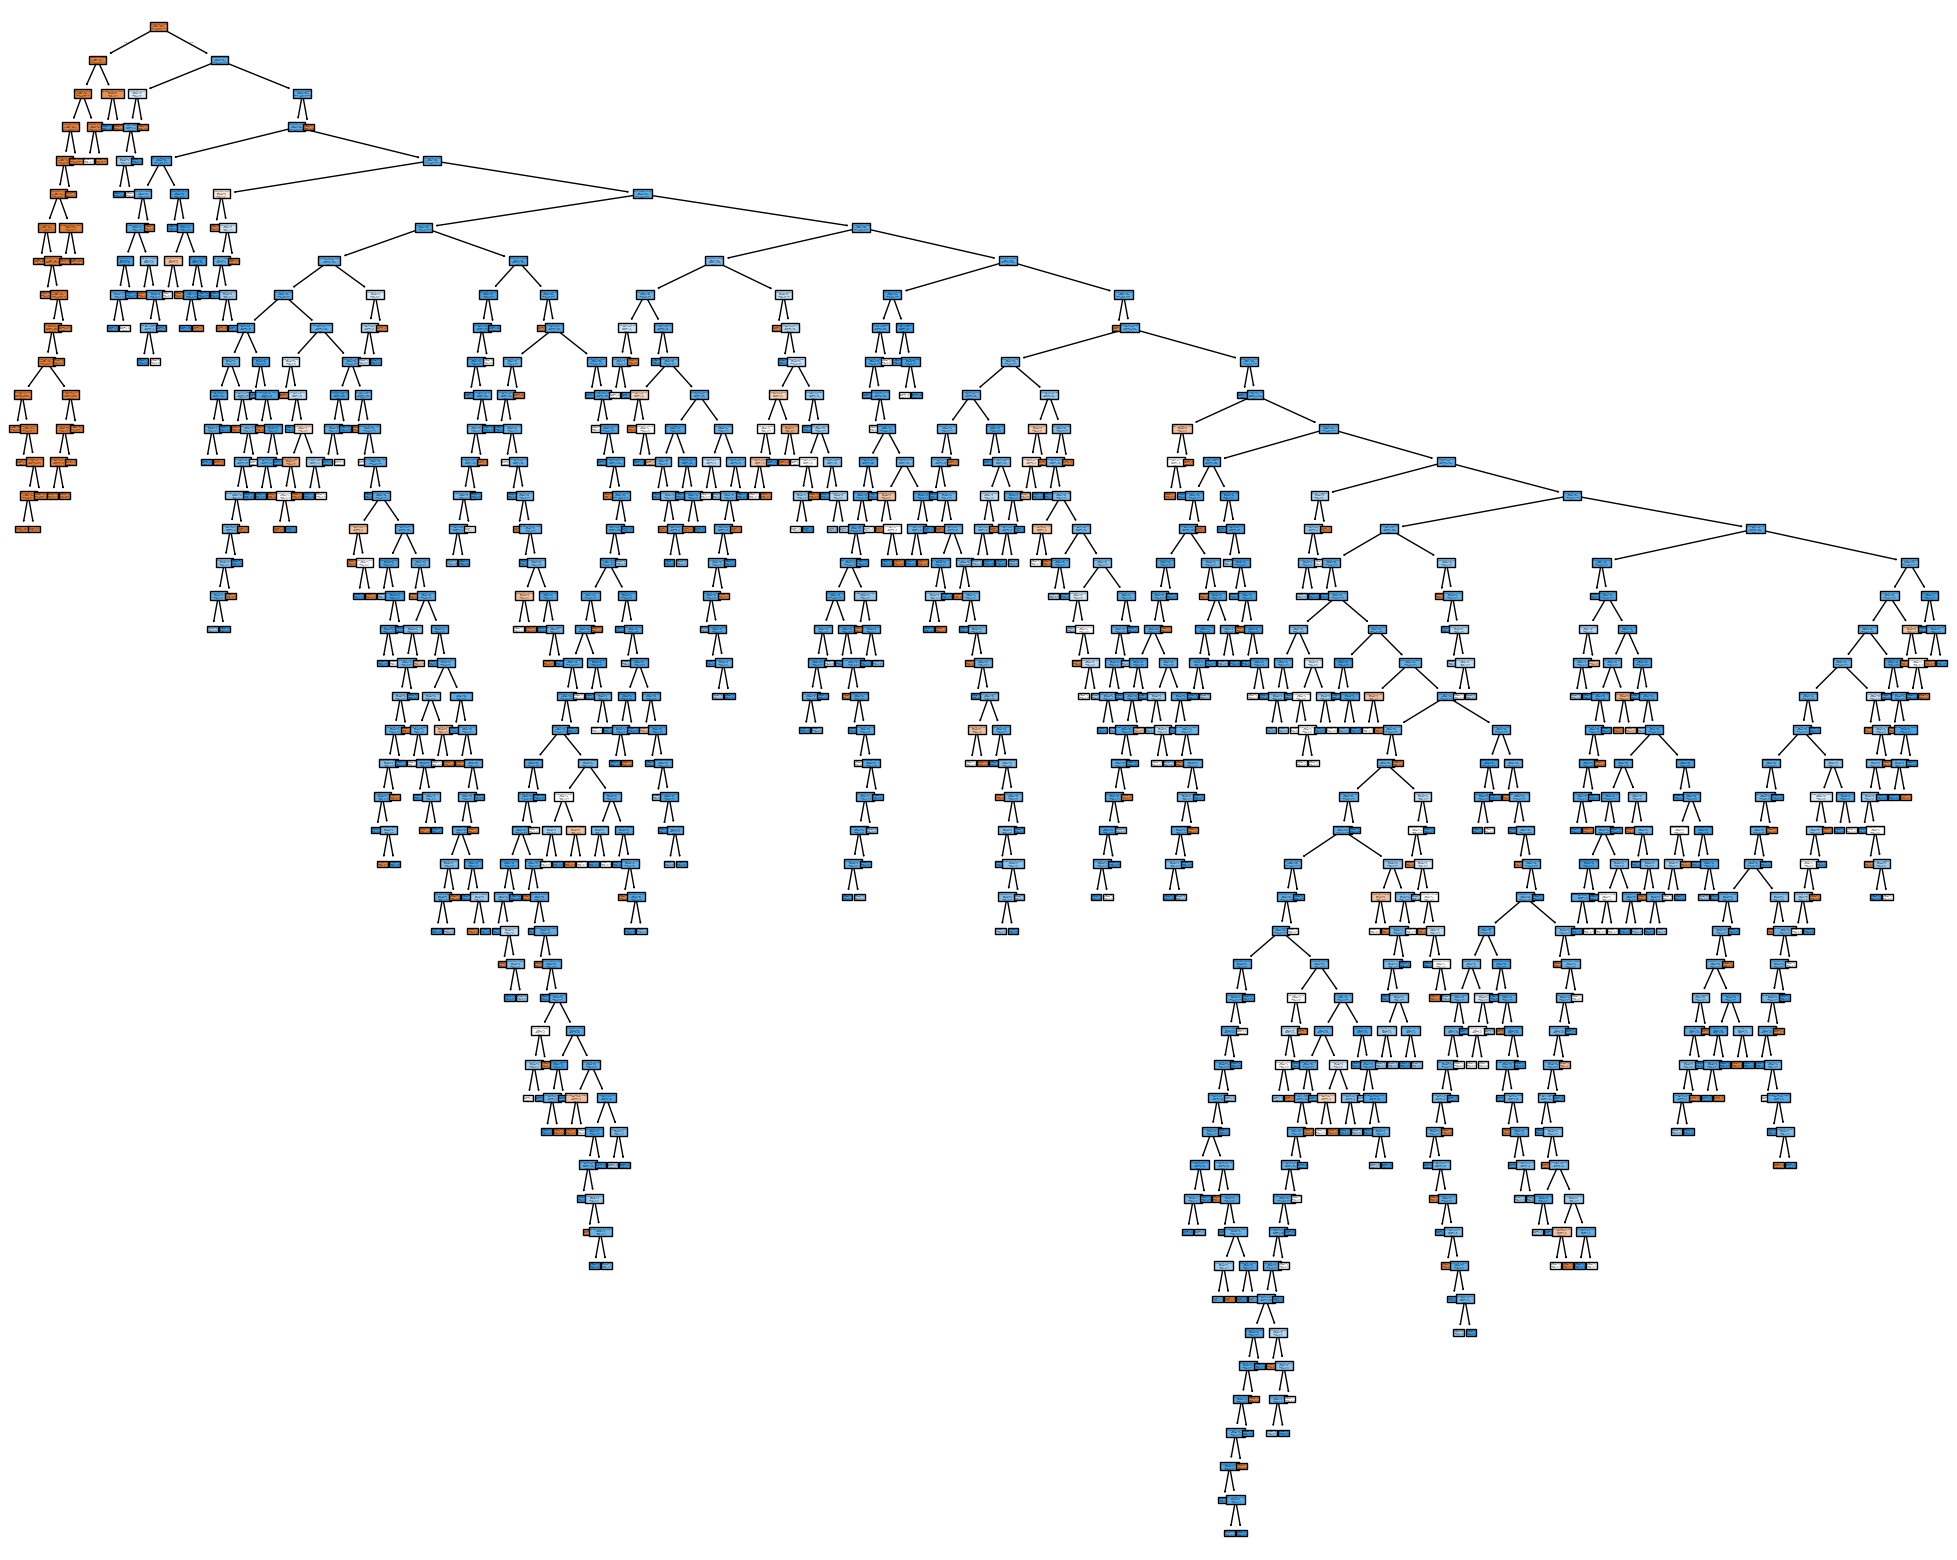

In [ ]:
from sklearn import tree

feature_names = df.columns.values.tolist()
feature_names.remove('loan_status')

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_corrected,
                   feature_names=feature_names,
                   class_names=['0', '1'],
                   filled=True)

In [ ]:
fig.savefig("decision_tree_1.png")

### Настройка гиперпараметров

Воспользуйтесь алгоритмом GridSearchCV для автоматического подбора гиперпараметров. Можете поэкспериментировать с диапазонами и критериями. После подбора лучших параметров вернитесь к пункту "Построение модели" и укажите новые параметры сборки. Сделайте предсказания, оцените модель и визуализируйте дерево решений.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Внимательно! </h1>
<b>В итоге у вас должно получиться две визуализации дерева решений. Не забудьте переименовать перед сохранением.</b>
</div>

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_param = {
'criterion': ['gini', 'entropy'],
'splitter' : ['best', 'random'],
'max_depth': [3,5,10,None],
'max_features': [1,3,5,7],
'min_samples_leaf': [1,2,3],
'min_samples_split': [1,2,3]
}

grid_search = GridSearchCV(estimator=model_corrected,param_grid=grid_param,cv=5,n_jobs =-1)

grid_search.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
960 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
960 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'max_features': [1, 3, 5, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']})

In [ ]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'}


In [ ]:
print(grid_search.best_score_)

0.9944380074313613


In [ ]:
best_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=2, splitter='random')
best_model.fit(X_train, y_train)

pred = best_model.predict(X_test)

balanced_accuracy = balanced_accuracy_score(y_test, pred)
print(balanced_accuracy)

0.994208275661307


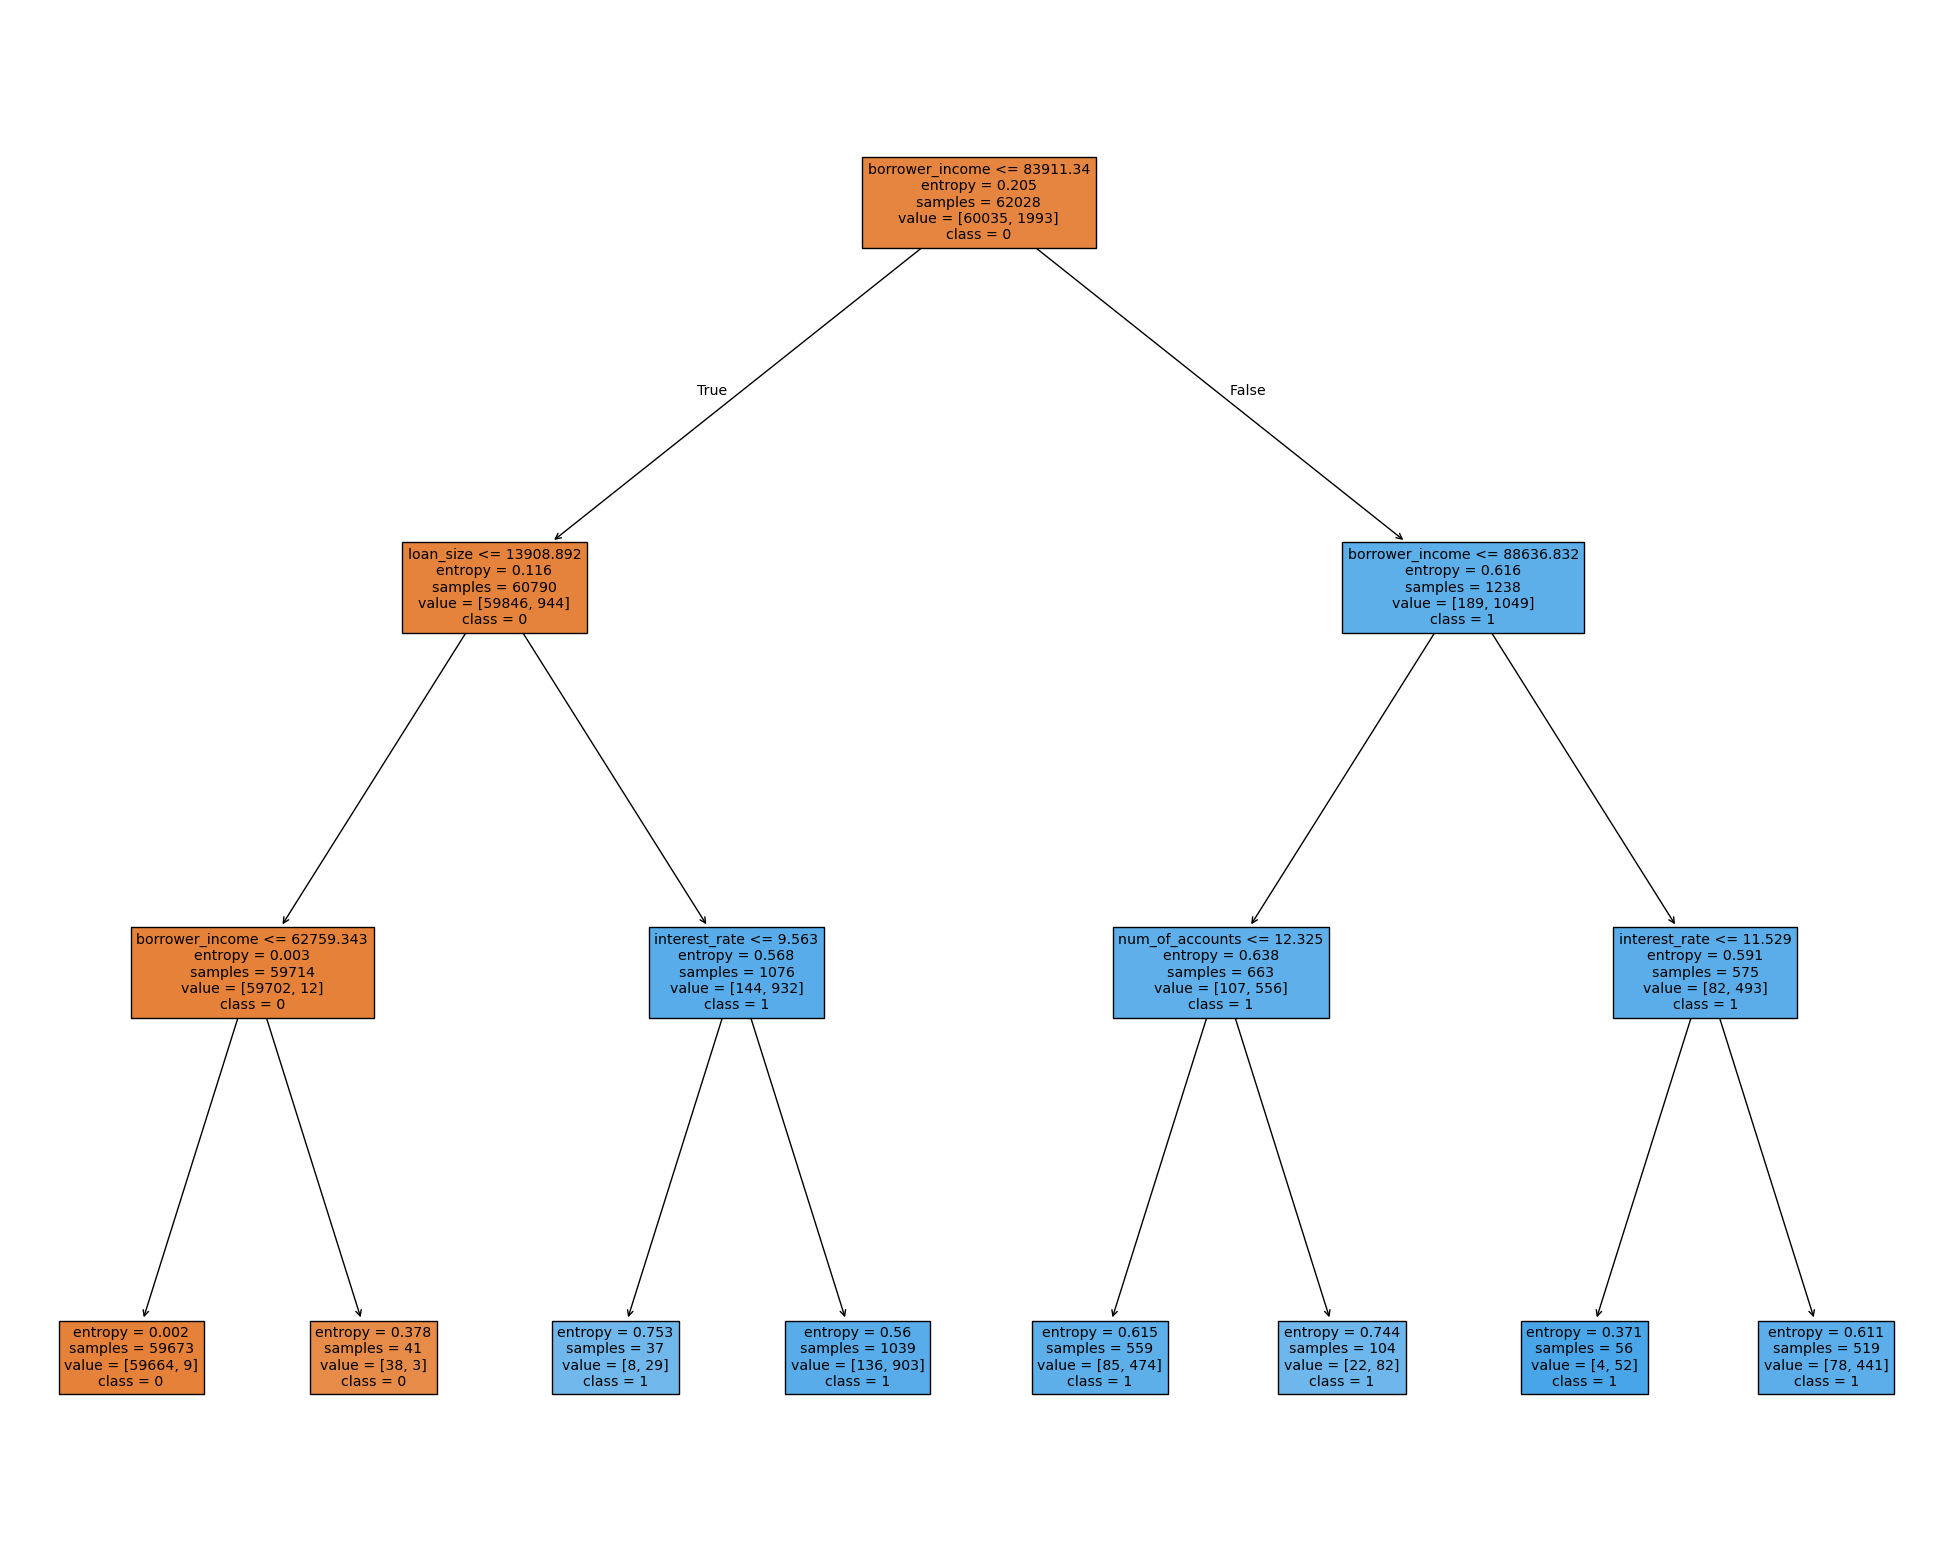

In [ ]:
from sklearn import tree

feature_names = df.columns.values.tolist()
feature_names.remove('loan_status')

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_model,
                   feature_names=feature_names,
                   class_names=['0', '1'],
                   filled=True)

In [ ]:
fig.savefig("decision_tree_2.png")